In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "../data/raw-data/gender/employment data/Gender_paid_unpaid.csv"
# Load the CSV file into a DataFrame
gender_paid_unpaid = pd.read_csv(file_path)
gender_paid_unpaid.head(10)

,COU,Country,Indicator,Sex,Unit,Value
0,AUS,Australia,"Time spent in unpaid work, by sex",Men,Minutes per day,171.6
1,AUS,Australia,"Time spent in unpaid work, by sex",Women,Minutes per day,311.0
2,AUS,Australia,"Time spent in paid work, by sex",Men,Minutes per day,304.1
3,AUS,Australia,"Time spent in paid work, by sex",Women,Minutes per day,172.0
4,AUT,Austria,"Time spent in unpaid work, by sex",Men,Minutes per day,135.3
5,AUT,Austria,"Time spent in unpaid work, by sex",Women,Minutes per day,269.2
6,AUT,Austria,"Time spent in paid work, by sex",Men,Minutes per day,364.8
7,AUT,Austria,"Time spent in paid work, by sex",Women,Minutes per day,248.8
8,BEL,Belgium,"Time spent in unpaid work, by sex",Men,Minutes per day,144.2
9,BEL,Belgium,"Time spent in unpaid work, by sex",Women,Minutes per day,237.3


In [3]:
# Drop the 'Unit' column
gender_paid_unpaid = gender_paid_unpaid.drop(columns=['Unit'])

# Rename the 'Value' column to 'min_per_day'
gender_paid_unpaid = gender_paid_unpaid.rename(columns={'Value': 'min_per_day'})
gender_paid_unpaid.head(10)

,COU,Country,Indicator,Sex,min_per_day
0,AUS,Australia,"Time spent in unpaid work, by sex",Men,171.6
1,AUS,Australia,"Time spent in unpaid work, by sex",Women,311.0
2,AUS,Australia,"Time spent in paid work, by sex",Men,304.1
3,AUS,Australia,"Time spent in paid work, by sex",Women,172.0
4,AUT,Austria,"Time spent in unpaid work, by sex",Men,135.3
5,AUT,Austria,"Time spent in unpaid work, by sex",Women,269.2
6,AUT,Austria,"Time spent in paid work, by sex",Men,364.8
7,AUT,Austria,"Time spent in paid work, by sex",Women,248.8
8,BEL,Belgium,"Time spent in unpaid work, by sex",Men,144.2
9,BEL,Belgium,"Time spent in unpaid work, by sex",Women,237.3


In [4]:
replace_indicator = {
    "Time spent in unpaid work, by sex": "time_unpaid",
    "Time spent in paid work, by sex": "time_paid"
}

# Replace the values in the 'Indicator' column
gender_paid_unpaid['Indicator'] = gender_paid_unpaid['Indicator'].replace(replace_indicator)
gender_paid_unpaid.head(10)

,COU,Country,Indicator,Sex,min_per_day
0,AUS,Australia,time_unpaid,Men,171.6
1,AUS,Australia,time_unpaid,Women,311.0
2,AUS,Australia,time_paid,Men,304.1
3,AUS,Australia,time_paid,Women,172.0
4,AUT,Austria,time_unpaid,Men,135.3
5,AUT,Austria,time_unpaid,Women,269.2
6,AUT,Austria,time_paid,Men,364.8
7,AUT,Austria,time_paid,Women,248.8
8,BEL,Belgium,time_unpaid,Men,144.2
9,BEL,Belgium,time_unpaid,Women,237.3


In [7]:
gender_paid_unpaid.to_csv('../data/clean_data/clean_gender_paid_unpaid.csv', index=False)

In [8]:
# A quick look at the dataset's statistics
print(gender_paid_unpaid.describe())

       min_per_day
count   136.000000
mean    234.006618
std      82.679826
min      40.800000
25%     170.375000
50%     236.250000
75%     289.200000
max     478.300000


In [9]:
# Count the number of occurrences of each unique value in the "Country" column
counts = gender_paid_unpaid['Country'].value_counts()
counts

Australia                       4
China (People's Republic of)    4
Portugal                        4
Spain                           4
Sweden                          4
Türkiye                         4
United Kingdom                  4
United States                   4
Estonia                         4
Austria                         4
India                           4
Latvia                          4
Slovenia                        4
South Africa                    4
Luxembourg                      4
Lithuania                       4
Poland                          4
Norway                          4
New Zealand                     4
Netherlands                     4
Mexico                          4
Korea                           4
Japan                           4
Italy                           4
Ireland                         4
Hungary                         4
Greece                          4
Germany                         4
France                          4
Finland       

In [10]:
gender_paid_unpaid.shape

(136, 5)

In [11]:
# Check if there is missing or empty values
gender_paid_unpaid.isnull().any().any()
# No missing values

False

In [12]:
# Calculate the average time spent in paid and unpaid work for both men and women across all countries
average_time = gender_paid_unpaid.groupby(['Indicator', 'Sex'])['min_per_day'].mean()
print("Average time spent in paid and unpaid work for both men and women across all countries:")
print(average_time)


Average time spent in paid and unpaid work for both men and women across all countries:
Indicator    Sex  
time_paid    Men      321.382353
             Women    218.238235
time_unpaid  Men      131.650000
             Women    264.755882
Name: min_per_day, dtype: float64


In [13]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)

# Calculate the average time spent in paid and unpaid work for each country
average_time_country = gender_paid_unpaid.groupby(['Country', 'Indicator', 'Sex'])['min_per_day'].mean()
print("\nAverage time spent in paid and unpaid work for each country:")
print(average_time_country.to_string())


Average time spent in paid and unpaid work for each country:
Country                       Indicator    Sex  
Australia                     time_paid    Men      304.1
                                           Women    172.0
                              time_unpaid  Men      171.6
                                           Women    311.0
Austria                       time_paid    Men      364.8
                                           Women    248.8
                              time_unpaid  Men      135.3
                                           Women    269.2
Belgium                       time_paid    Men      273.7
                                           Women    199.2
                              time_unpaid  Men      144.2
                                           Women    237.3
Canada                        time_paid    Men      340.5
                                           Women    268.3
                              time_unpaid  Men      148.1
                   

### Gender gap analysis: Compute the gender gap for both paid and unpaid work in each country, and identify countries with the highest and lowest gaps.

In [14]:
# Find the top 3 countries with the highest difference between men's and women's time spent in paid work
paid_work_gap = gender_paid_unpaid[gender_paid_unpaid['Indicator'] == 'time_paid'].pivot_table(index=['Country'], columns='Sex', values='min_per_day')
paid_work_gap['difference'] = abs(paid_work_gap['Men'] - paid_work_gap['Women'])
top_3_paid_work_gap = paid_work_gap.nlargest(3, 'difference')
print("\nTop 3 countries with the highest difference between men's and women's time spent in paid work:")
print(top_3_paid_work_gap)


Top 3 countries with the highest difference between men's and women's time spent in paid work:
Sex        Men  Women  difference
Country                          
Mexico   478.3  236.3       242.0
Türkiye  358.3  133.9       224.4
India    390.6  184.7       205.9


In [15]:
# Find the top 3 countries with the highest difference between men's and women's time spent in unpaid work
unpaid_work_gap = gender_paid_unpaid[gender_paid_unpaid['Indicator'] == 'time_unpaid'].pivot_table(index=['Country'], columns='Sex', values='min_per_day')
unpaid_work_gap['difference'] = abs(unpaid_work_gap['Men'] - unpaid_work_gap['Women'])
top_3_unpaid_work_gap = unpaid_work_gap.nlargest(3, 'difference')
print("\nTop 3 countries with the highest difference between men's and women's time spent in unpaid work:")
print(top_3_unpaid_work_gap)



Top 3 countries with the highest difference between men's and women's time spent in unpaid work:
Sex        Men  Women  difference
Country                          
India     51.8  351.9       300.1
Türkiye   67.6  305.0       237.4
Portugal  96.3  328.2       231.9


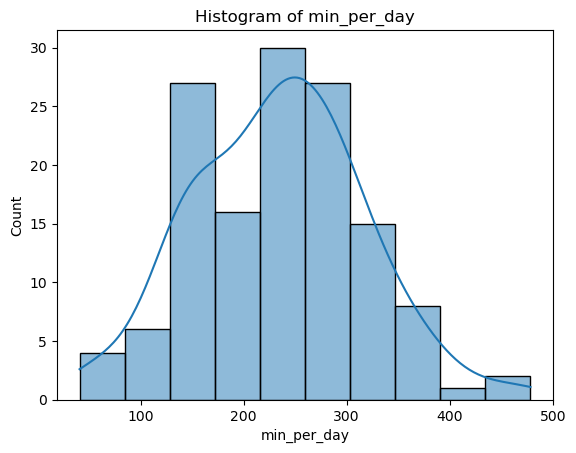

In [16]:
# Histograms for the `min_per_day` variable
plt.figure()
sns.histplot(data=gender_paid_unpaid, x='min_per_day', kde=True)
plt.title("Histogram of min_per_day")
plt.show()


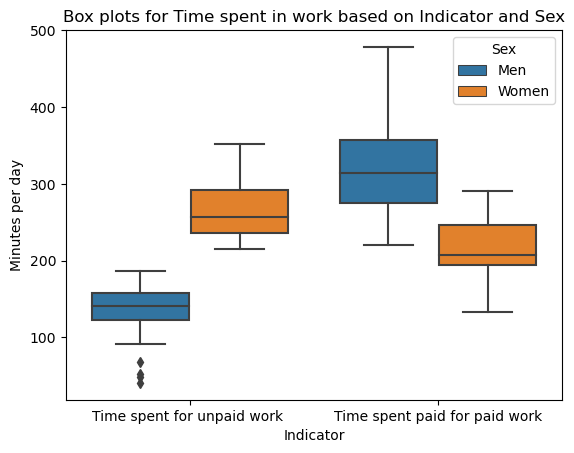

In [17]:
# Box plots for `min_per_day` based on `Indicator` and `Sex`
plt.figure()
ax = sns.boxplot(data=gender_paid_unpaid, x='Indicator', y='min_per_day', hue='Sex')
plt.title("Box plots for Time spent in work based on Indicator and Sex")
ax.set_xticklabels(['Time spent for unpaid work ', 'Time spent paid for paid work'])
ax.set_ylabel('Minutes per day')

plt.show()


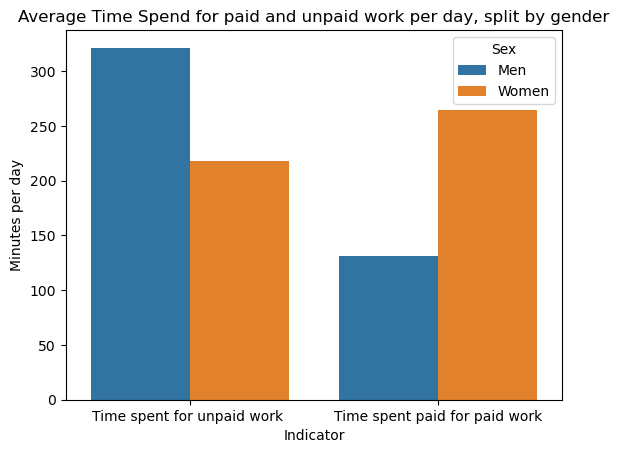

In [18]:
# Bar plots comparing average `min_per_day` for paid and unpaid work, split by gender
average_time = gender_paid_unpaid.groupby(['Indicator', 'Sex'])['min_per_day'].mean().reset_index()
plt.figure()
ax = sns.barplot(data=average_time, x='Indicator', y='min_per_day', hue='Sex')
ax.set_xticklabels(['Time spent for unpaid work ', 'Time spent paid for paid work'])
ax.set_ylabel('Minutes per day')
plt.title("Average Time Spend for paid and unpaid work per day, split by gender")
plt.show()




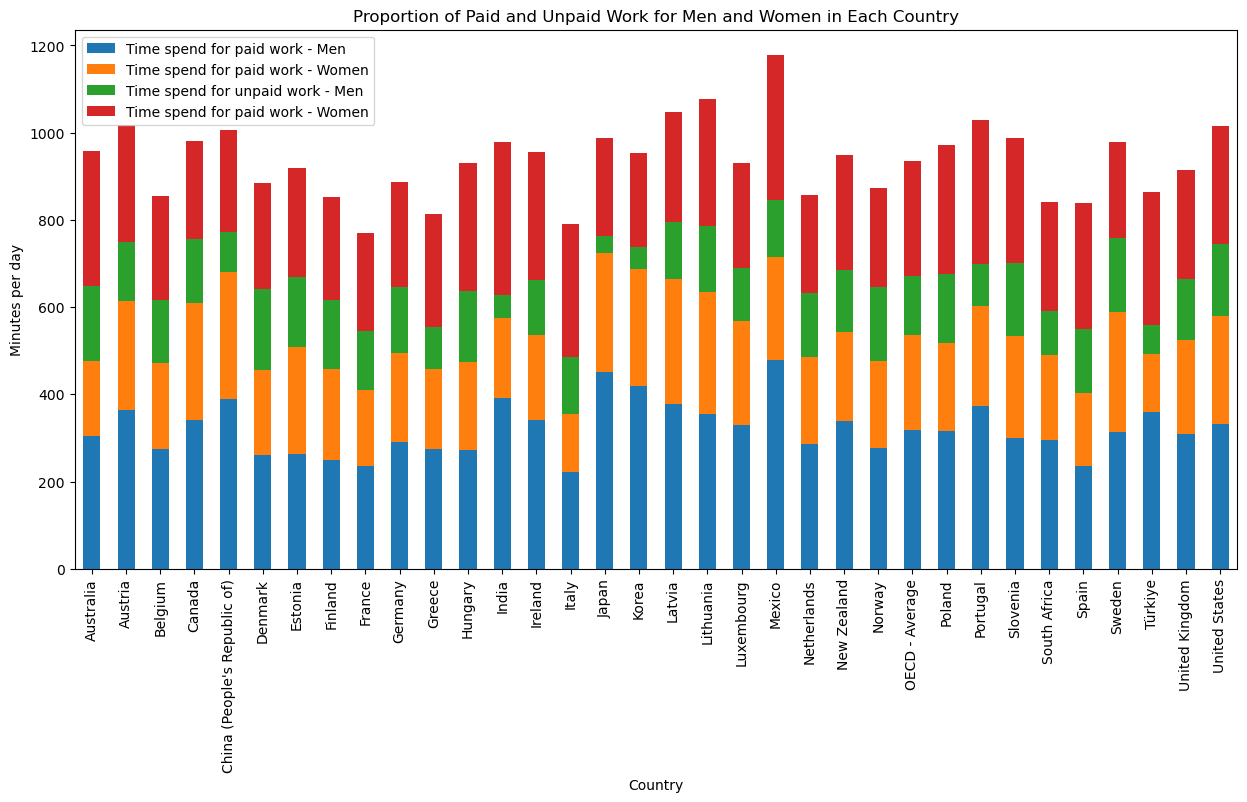

In [19]:
# Stacked bar plot
stacked_bar_data = gender_paid_unpaid.pivot_table(index=['Country'], columns=['Indicator', 'Sex'], values='min_per_day', aggfunc='mean')
ax = stacked_bar_data.plot(kind='bar', stacked=True, figsize=(15, 7))
ax.legend(['Time spend for paid work - Men', 'Time spend for paid work - Women', 'Time spend for unpaid work - Men', 'Time spend for paid work - Women'])
plt.title("Proportion of Paid and Unpaid Work for Men and Women in Each Country")
plt.ylabel("Minutes per day")
plt.show()

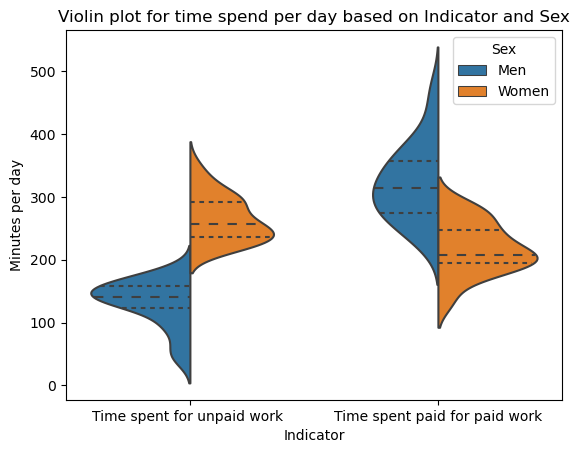

In [20]:
# Violin plot
plt.figure()
ax = sns.violinplot(data=gender_paid_unpaid, x='Indicator', y='min_per_day', hue='Sex', split=True, inner="quartile")
ax.set_xticklabels(['Time spent for unpaid work ', 'Time spent paid for paid work'])
ax.set_ylabel('Minutes per day')

plt.title("Violin plot for time spend per day based on Indicator and Sex")
plt.show()


### Cluster analysis: Perform clustering (e.g., using k-means) to group countries with similar patterns of time spent in paid and unpaid work for men and women.

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [22]:
# Pivot the data
pivot_data = gender_paid_unpaid.pivot_table(index='Country', columns=['Indicator', 'Sex'], values='min_per_day')
pivot_data.head(15)

Indicator                    time_paid        time_unpaid       
Sex                                Men  Women         Men  Women
Country                                                         
Australia                        304.1  172.0       171.6  311.0
Austria                          364.8  248.8       135.3  269.2
Belgium                          273.7  199.2       144.2  237.3
Canada                           340.5  268.3       148.1  223.7
China (People's Republic of)     390.0  291.0        91.0  234.0
Denmark                          260.1  194.6       186.1  242.8
Estonia                          264.1  244.9       160.2  249.2
Finland                          248.6  209.9       157.5  235.8
France                           235.1  175.4       134.9  224.0
Germany                          289.5  205.5       150.4  242.3
Greece                           274.3  184.5        95.1  259.5
Hungary                          272.7  202.5       162.3  293.8
India                            390.6  184.7        51.8  351.9
Ireland                          340.8  194.9       127.0  292.5
Italy                            220.8  133.1       130.7  306.3

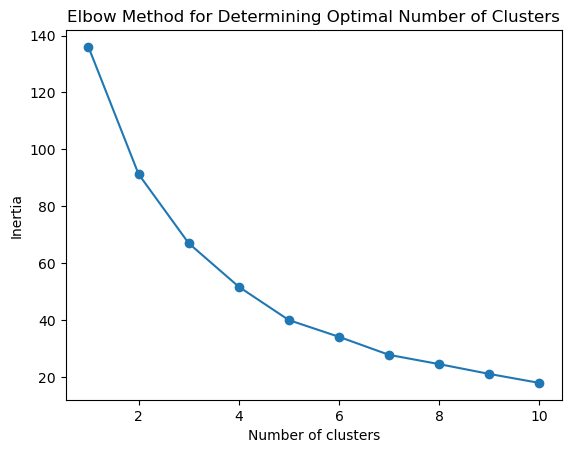

In [23]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot_data)

# Determine the number of clusters using the elbow method
inertias = []
range_clusters = range(1, 11)
# The optimal number of clusters is usually found at the "elbow" point


for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)
    
# Plot the elbow method results
plt.figure()
plt.plot(range_clusters, inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.show()

In [24]:
# Perform k-means clustering with the optimal number of clusters determined based on the elbow method results.
optimal_clusters = 6  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
# Fit the KMeans model to the standardized data and predict the cluster labels
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original pivoted data
pivot_data['Cluster'] = clusters
print(pivot_data)


Indicator                    time_paid        time_unpaid        Cluster
Sex                                Men  Women         Men  Women        
Country                                                                 
Australia                        304.1  172.0       171.6  311.0       1
Austria                          364.8  248.8       135.3  269.2       2
Belgium                          273.7  199.2       144.2  237.3       0
Canada                           340.5  268.3       148.1  223.7       2
China (People's Republic of)     390.0  291.0        91.0  234.0       4
Denmark                          260.1  194.6       186.1  242.8       0
Estonia                          264.1  244.9       160.2  249.2       0
Finland                          248.6  209.9       157.5  235.8       0
France                           235.1  175.4       134.9  224.0       0
Germany                          289.5  205.5       150.4  242.3       0
Greece                           274.3  184.5      

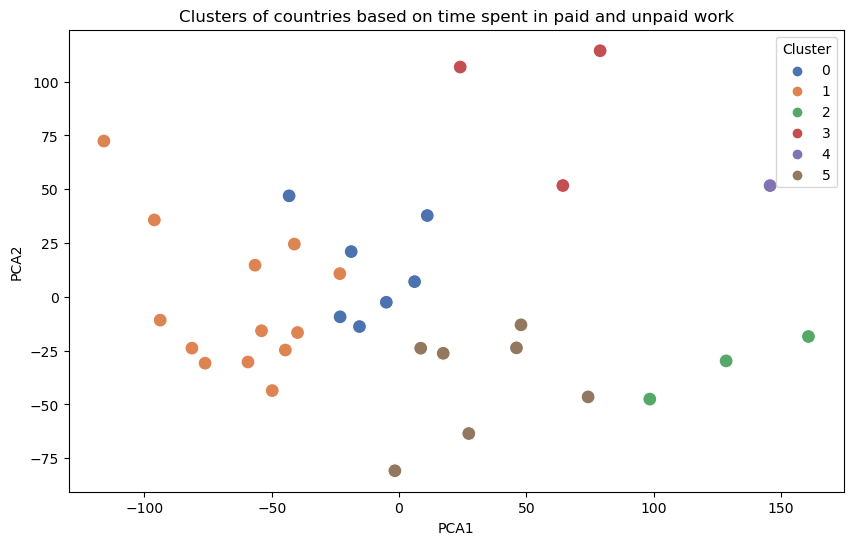

In [26]:
from sklearn.decomposition import PCA
# Pivot the dataframe to have separate columns for each combination of Indicator and Sex
gender_paid_unpaid_pivot = gender_paid_unpaid.pivot_table(values='min_per_day', index=['COU', 'Country'], columns=['Indicator', 'Sex']).reset_index()

# Perform PCA to reduce the dimensionality of the data to 2 principal components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(gender_paid_unpaid_pivot.iloc[:, 2:])

# Add the PCA results and cluster labels to the pivoted dataframe
gender_paid_unpaid_pivot['PCA1'] = pca_result[:, 0]
gender_paid_unpaid_pivot['PCA2'] = pca_result[:, 1]

# Perform k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(gender_paid_unpaid_pivot.iloc[:, 2:6])
gender_paid_unpaid_pivot['Cluster'] = kmeans.labels_

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gender_paid_unpaid_pivot, x='PCA1', y='PCA2', hue='Cluster', palette='deep', s=100)
plt.title('Clusters of countries based on time spent in paid and unpaid work')
plt.show()


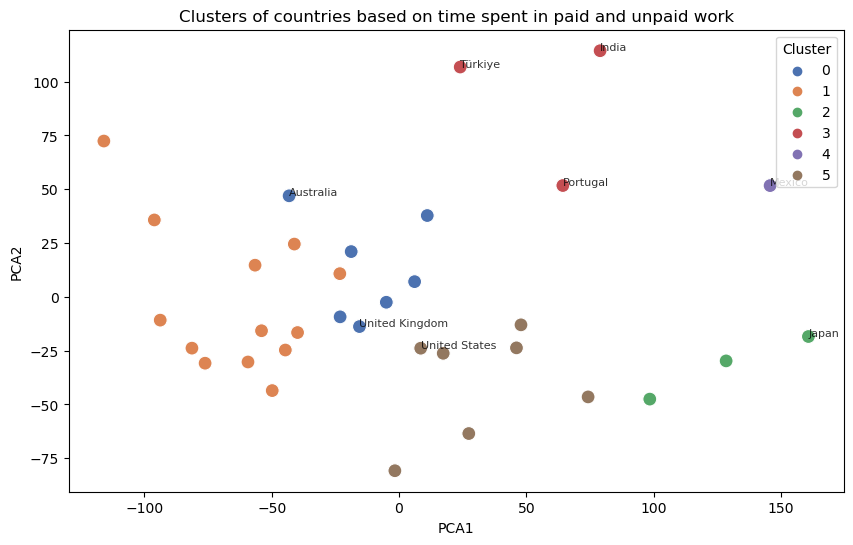

In [27]:
# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gender_paid_unpaid_pivot, x='PCA1', y='PCA2', hue='Cluster', palette='deep', s=100)
plt.title('Clusters of countries based on time spent in paid and unpaid work')

# Annotate specific countries of interest
countries_of_interest = ['Australia', 'Japan', 'India', 'Türkiye', 'United Kingdom', 'United States', 'Mexico', 'Portugal']

for _, row in gender_paid_unpaid_pivot.iterrows():
    country = row['Country'].values[0]
    if country in countries_of_interest:
        plt.annotate(country, (row['PCA1'], row['PCA2']), fontsize=8, alpha=0.8)

plt.show()


PCA1 and PCA2 are the first two principal components resulting from Principal Component Analysis (PCA). They are new axes that capture the maximum variation in the data. These components are linear combinations of the original features of the dataset, transformed in such a way that they are orthogonal and uncorrelated.

In this specific case, PCA1 and PCA2 represent the two most significant dimensions of variation in the time spent in paid and unpaid work for men and women across different countries. They are used to visualize the high-dimensional data in a 2D scatter plot.

However, keep in mind that these principal components do not directly represent any specific feature of the original dataset. Instead, they are a combination of the original features, making it challenging to interpret them individually. The purpose of PCA is primarily for dimensionality reduction and visualization, enabling us to observe patterns, clusters, or relationships in the data more easily.